In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("heart.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<Axes: >

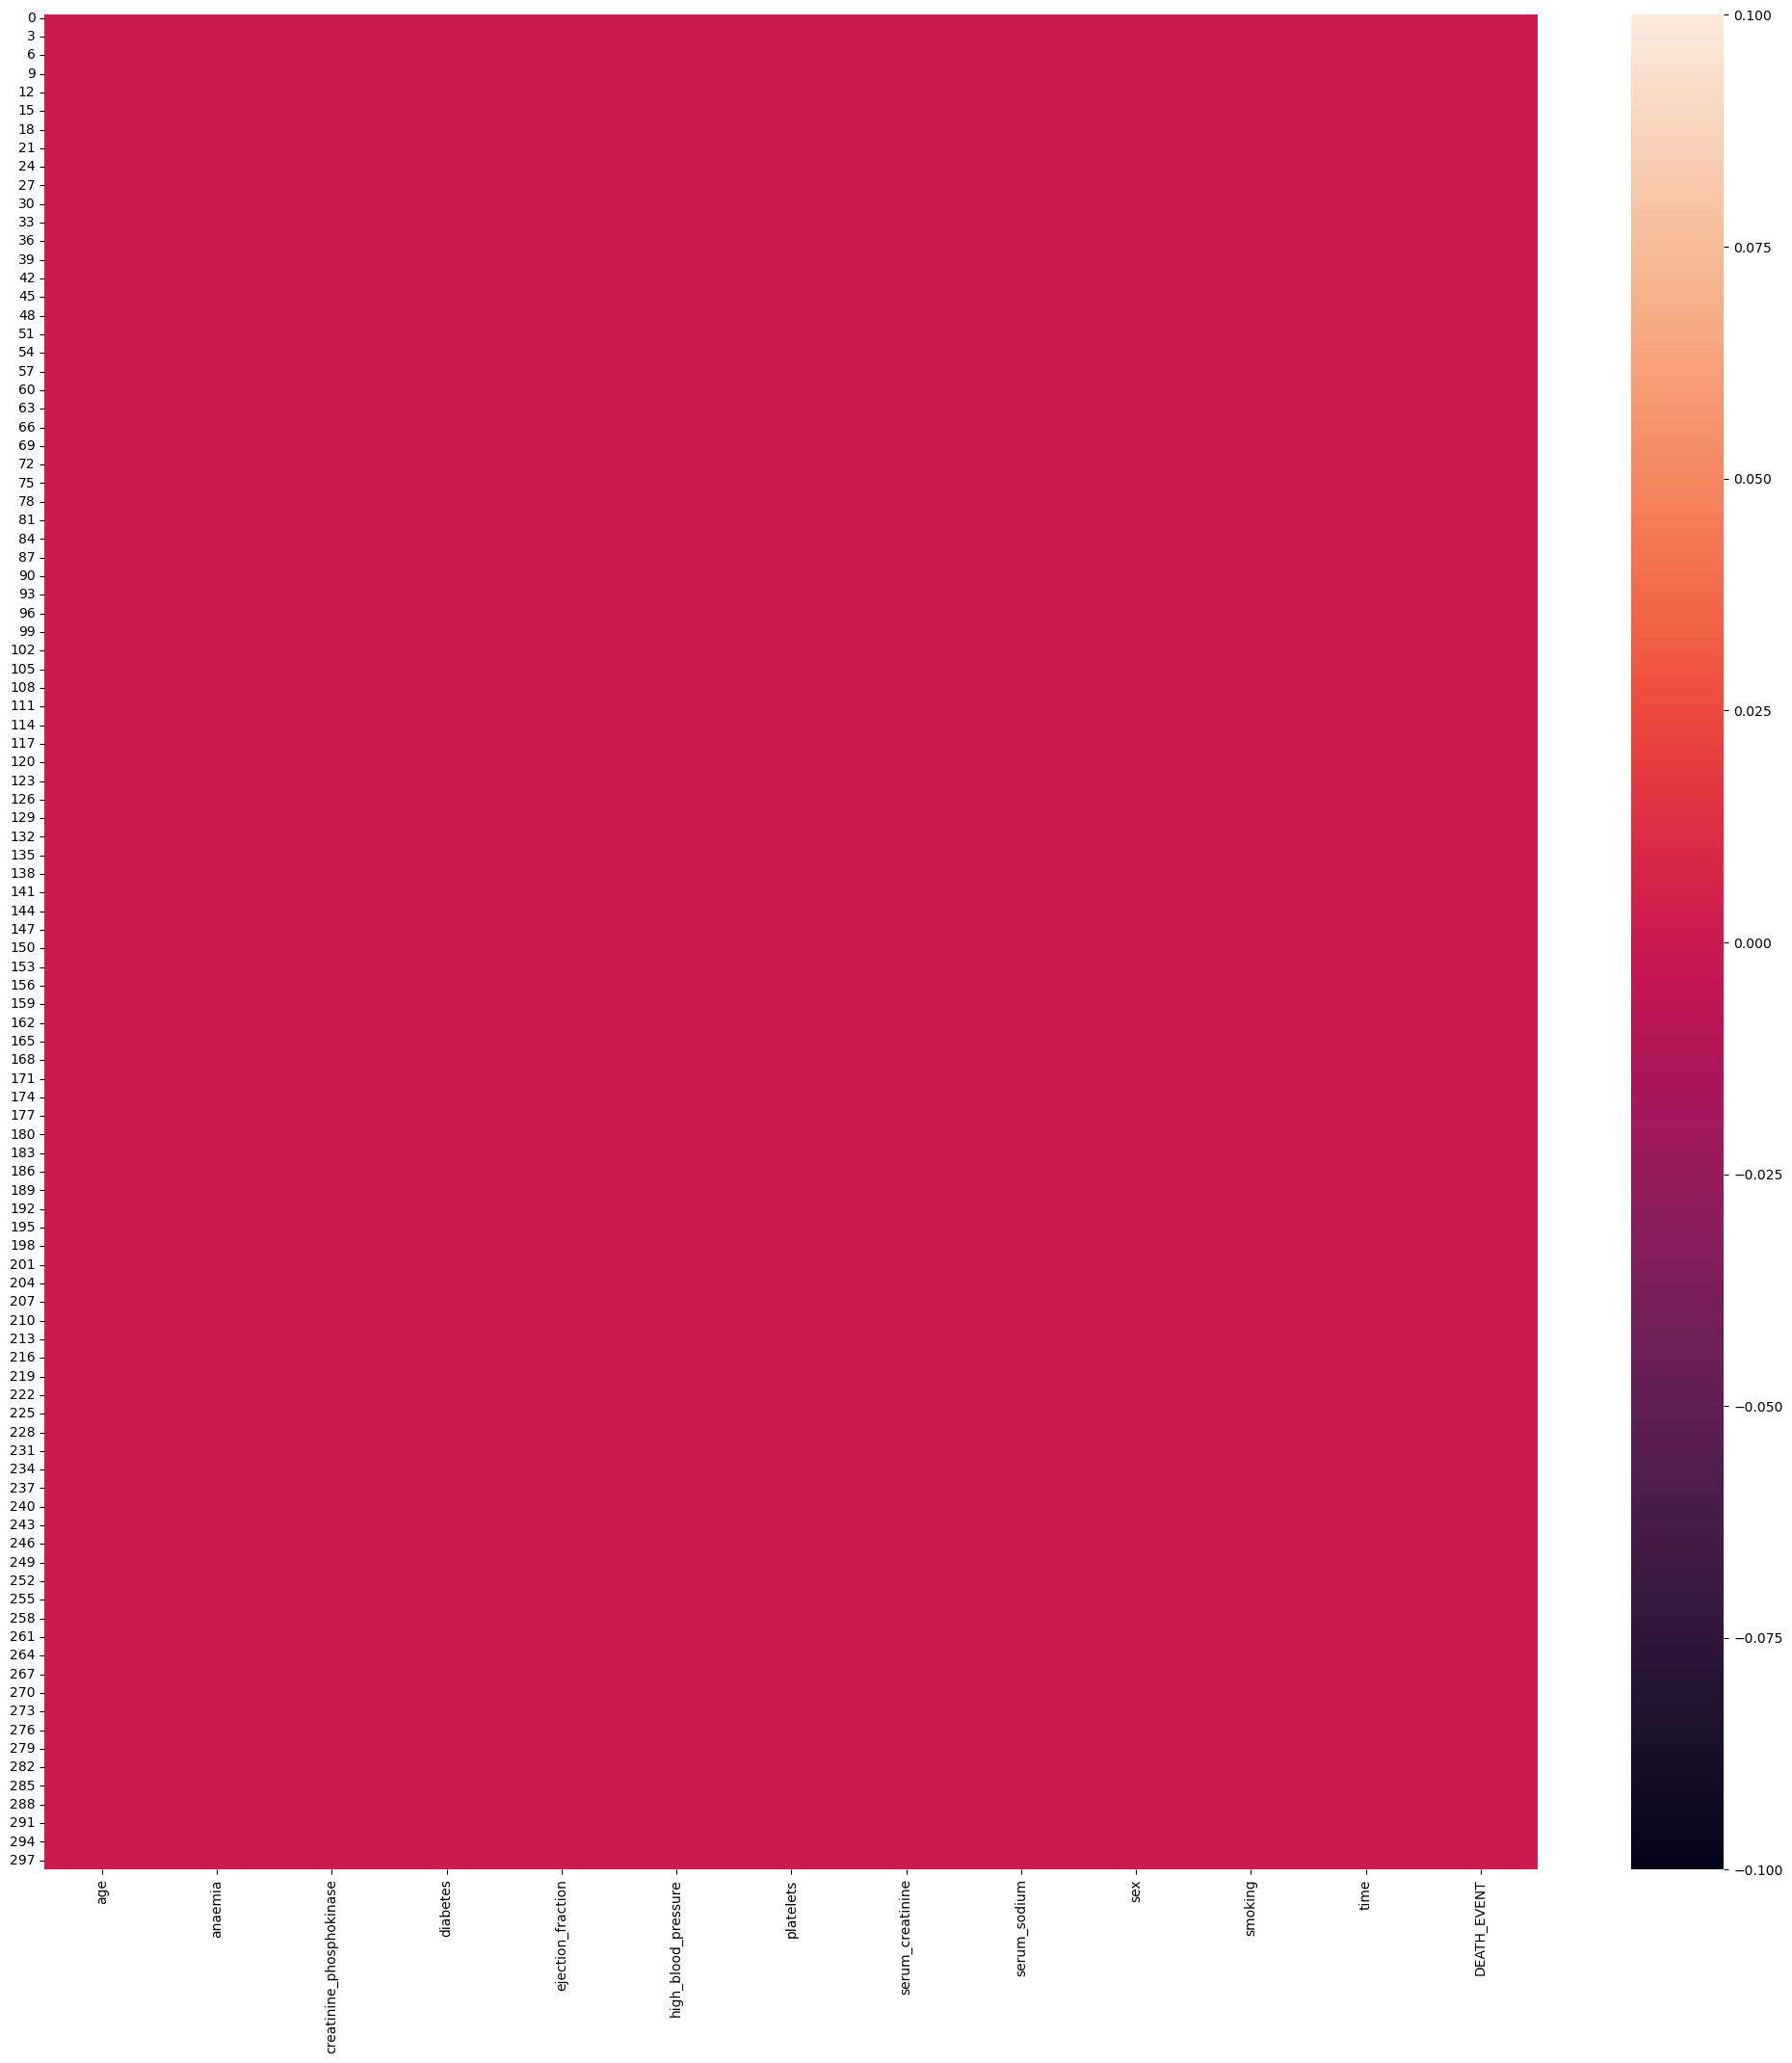

In [5]:
# using heatmap for data cleaning
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())
#you can observe the 

Total number of Alive cases:- 203
Total number of Dead cases:- 96


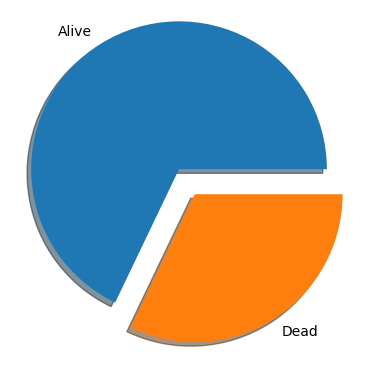

In [57]:
# distribution of classes,this will help us to identify which types
live=df['DEATH_EVENT'][df['DEATH_EVENT'] == 0]
num_live=len(live)
death=df['DEATH_EVENT'][df['DEATH_EVENT'] == 1]
num_death=len(death)
x_axis=np.array([num_live,num_death])
labels=['Alive','Dead']
print(f'Total number of Alive cases:- {num_live}')
print(f'Total number of Dead cases:- {num_death}')
plt.pie(x_axis, labels = labels, explode=[0.2,0.0], shadow = True)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13592\2850502554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['diabetes'])


<Axes: xlabel='diabetes', ylabel='Density'>

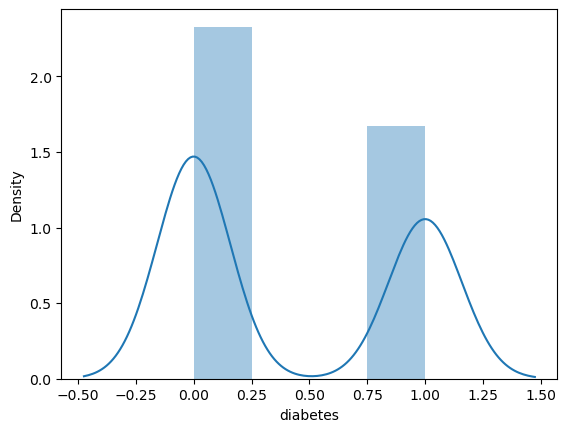

In [58]:
# distribution of Diabetes
sns.distplot(df['diabetes'])

In [59]:
#to check missing data in percentage format we use following
#here we use df.shape df.shape[0] it means we want only rows and columns
null_var=df.isnull().sum()/df.shape[0]*100
null_var

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

In [8]:
X=df.drop("DEATH_EVENT", axis=1)
# to show the matrix we define x capital
# we drop total_sqft because it depended variables 
y=df["DEATH_EVENT"]
# y is show to vector for (depended variable)
print('shape of x= ', X.shape)
print('shape of y= ', y.shape)

shape of x=  (299, 12)
shape of y=  (299,)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=51)
print('shape of the X_train= ', X_train.shape)
print('shape of the y_train= ', y_train.shape)
print('shape of the X_test= ', X_test.shape)
print('shape of the y_test= ', y_test.shape)

shape of the X_train=  (239, 12)
shape of the y_train=  (239,)
shape of the X_test=  (60, 12)
shape of the y_test=  (60,)


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [12]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [13]:
#Random Forest Classifier
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [14]:
sc.fit(X_train)

StandardScaler()

# load random forest classifier

In [60]:
# load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [62]:
Classifier = RandomForestClassifier(criterion='gini')
Classifier.fit(X_train,y_train)


RandomForestClassifier()

In [64]:
X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
251,55.0,0,572,1,35,0,231000.00,0.80,143,0,0,215
65,60.0,0,68,0,20,0,119000.00,2.90,127,1,1,64
202,70.0,0,97,0,60,1,220000.00,0.90,138,1,0,186
130,53.0,1,1808,0,60,1,249000.00,0.70,138,1,1,106
201,45.0,0,308,1,60,1,377000.00,1.00,136,1,0,186
42,70.0,0,571,1,45,1,185000.00,1.20,139,1,1,33
113,70.0,1,143,0,60,0,351000.00,1.30,137,0,0,90
285,55.0,1,170,1,40,0,336000.00,1.20,135,1,0,250
171,52.0,0,3966,0,40,0,325000.00,0.90,140,1,1,146
220,73.0,0,582,0,20,0,263358.03,1.83,134,1,0,198


In [66]:
y_pred=Classifier.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [67]:
y_test.head()

251    0
65     1
202    0
130    0
201    0
Name: DEATH_EVENT, dtype: int64

In [69]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [70]:
Classifier.score(X_test,y_test)

0.8666666666666667

# Now use the Confusion Matrix

In [71]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
cm = confusion_matrix(y_test,y_pred)

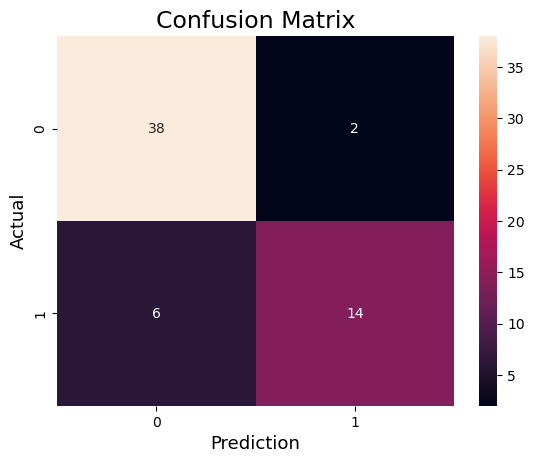

In [74]:
# Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Actual', fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [75]:
# Finding precision and recall
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8666666666666667


In [76]:
precision = precision_score(y_test,y_pred, average='macro')
print(precision)

0.8693181818181819


In [77]:
recall = recall_score(y_test,y_pred, average='macro')
print(recall)

0.825


In [78]:
F1_score = f1_score(y_test,y_pred, average='macro')
print(F1_score)

0.8412698412698412


# Now used the Decision Tree Classification

In [79]:
#Decision Tree Classification -ML Model Training
from sklearn.tree import DecisionTreeClassifier

In [80]:
Classifier = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0)
Classifier.fit(X_train,y_train)
Classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
Classifier.score(X_test,y_test)

0.85

# Now use the Support Vector Classification

In [82]:
from sklearn.svm import SVC
classification_rbf =SVC(kernel='rbf')
classification_rbf.fit(X_train, y_train)

SVC()

In [83]:
classification_rbf.score(X_test,y_test)

0.6666666666666666

In [84]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [85]:
classification_rbf_2=SVC(kernel='rbf')
classification_rbf_2.fit(X_train_sc,y_train)
classification_rbf_2.score(X_test_sc,y_test)


0.8833333333333333

# Tune Parameter

# Regularization (C)

In [86]:
model_c=SVC(C=5)
model_c.fit(X_train,y_train)
model_c.score(X_test,y_test)


0.6666666666666666

In [87]:
model_c=SVC(C=10)
model_c.fit(X_train,y_train)
model_c.score(X_test,y_test)

0.6666666666666666

# Gamma

In [88]:
model_g=SVC(gamma=5)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

0.6666666666666666

# SVC with kernal polynomial

In [89]:
classification_poly=SVC(kernel='poly',degree=2)
classification_poly.fit(X_train_sc,y_train)
classification_poly.score(X_test_sc,y_test)

0.7333333333333333

# SVC with kernal linear

In [90]:
classification_linear=SVC(kernel='linear')
classification_linear.fit(X_train_sc,y_train)
classification_linear.score(X_test_sc,y_test)


0.8833333333333333

In [91]:
## Now use the K-Fold

# K-Fold

In [92]:
 from sklearn.neighbors import KNeighborsClassifier

In [93]:
Classifier = KNeighborsClassifier(n_neighbors=5)
Classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [95]:
score_knn=cross_val_score(KNeighborsClassifier(n_neighbors=20), X_train,y_train,cv=2)
print(score_knn)
print("Avg :",np.average(score_knn))


[0.68333333 0.68067227]
Avg : 0.6820028011204482


In [96]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=100),X_train,y_train,cv=5)
print(score_rf)
print("Avg:",np.average(score_rf))

[0.9375     0.8125     0.8125     0.83333333 0.82978723]
Avg: 0.8451241134751774
